In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataframe
df = pd.read_csv('Data/tmdb_results_combined_2000_2001.csv.gz')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1859.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,45.0,R


In [3]:
#creat new dataframe with columns needed for analysis and visualisation
df_new = df[['imdb_id','budget','revenue', 'release_date', 'certification']]
df_new.head()

,imdb_id,budget,revenue,release_date,certification
0,tt0113026,10000000.0,0.0,2000-09-22,NaN
1,tt0113092,0.0,0.0,2000-11-15,NaN
2,tt0116391,0.0,0.0,2000-04-14,NaN
3,tt0118694,150000.0,12854953.0,2000-09-29,PG
4,tt0118852,0.0,0.0,2000-09-02,R


In [4]:
#check info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        2472 non-null   object 
 1   budget         2472 non-null   float64
 2   revenue        2472 non-null   float64
 3   release_date   2450 non-null   object 
 4   certification  785 non-null    object 
dtypes: float64(2), object(3)
memory usage: 96.7+ KB


* How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [5]:
#check number of movies that have at least some valid financial information
len(df_new[(df_new['budget']>0) | (df_new['revenue']>0)])

615

* Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [6]:
#creat new dataframe without 0's for budget AND revenue
clean_df = df_new[(df_new['budget']>0) & (df_new['revenue']>0)]
clean_df

,imdb_id,budget,revenue,release_date,certification
3,tt0118694,150000.0,12854953.0,2000-09-29,PG
10,tt0120467,120000.0,14904.0,2002-04-26,R
12,tt0120630,45000000.0,224834564.0,2000-06-21,G
15,tt0120753,8000000.0,105983.0,2000-02-09,R
16,tt0120755,125000000.0,546388105.0,2000-05-24,PG-13
...,...,...,...,...,...
2181,tt0294289,344.0,4.0,2001-09-29,NaN
2211,tt0296042,1400010.0,80631.0,2001-12-22,NaN
2313,tt0310790,3747230.0,1951816.0,2001-01-01,NaN
2411,tt0445841,12500000.0,123021750.0,2001-10-11,NaN


* How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [7]:
def show_values(axs, orient="v", space=.01):
    """used a code from https://www.statology.org/seaborn-barplot-show-values/, to show values on barplot"""
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

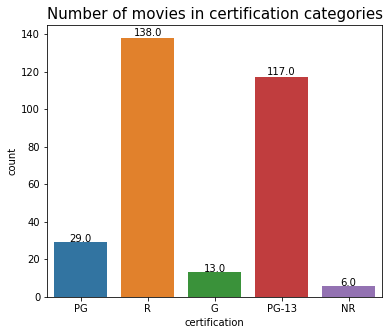

In [16]:
#creat countplot
plt.figure(figsize=(6,5))
ax = sns.countplot(data=clean_df, x ='certification')
ax.set_title('Number of movies in certification categories', fontsize=15)
show_values(ax)
plt.savefig('Number of movies in certification categories.png', dpi = 200);

We have the most movies in categories R and PG-13, 138 and 117 correspondingly. 

* What is the average revenue per certification category?

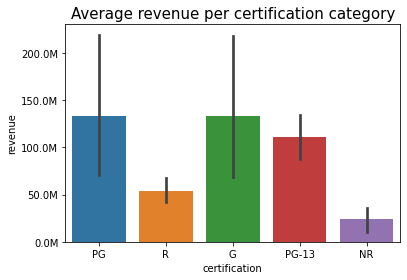

In [17]:
#creat a barplot
#used code from: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions to show millions 
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions) 

plt.figure(figsize=(6,4))
ax = sns.barplot(data=clean_df, x ='certification', y = 'revenue')
ax.set_title('Average revenue per certification category', fontsize=15)
ax.yaxis.set_major_formatter(formatter)
plt.savefig('Average revenue per certification category.png', dpi = 200);

The highest average revenue have categories PG an G on level of 140.000.000 $.

* What is the average budget per certification category?

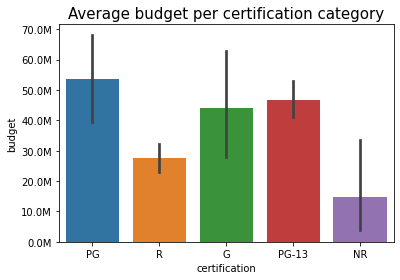

In [18]:
#creat a barplot
plt.figure(figsize=(6,4))
ax = sns.barplot(data=clean_df, x ='certification', y = 'budget')
ax.set_title('Average budget per certification category', fontsize=15)
ax.yaxis.set_major_formatter(formatter)
plt.savefig('Average budget per certification category.png', dpi = 200);

The highest average budget has a category PG.